# Figure 2: Map colored by surface mass load

### 1. Load packages

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from global_land_mask import globe
import scipy.stats as stats
import os
import importlib
import geopandas as gpd
# from tqdm import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm

# file containing functions:
import loadquakes
importlib.reload(loadquakes)

ERROR 1: PROJ: proj_create_from_database: Open of /home/amand4/anaconda3/envs/syamsul_2023/share/proj failed


<module 'loadquakes' from '/home/amand4/notebooks/SLIM/loadquakes.py'>

### 2. Load datasets

In [2]:
# GRACE data
dataset_path = '/data/fast1/surface-load/'
ds = xr.open_dataset(dataset_path + "GRCTellus.JPL.200204_202201.GLO.RL06M.MSCNv02CRI.nc")
catalog = pd.read_csv('catalog.csv')
etas_declustered = pd.read_csv('etas_declustered.csv')
NND_declustered = pd.read_csv('NND_declustered.csv') # eta0 = 10
NND_declustered_v2 = pd.read_csv('NND_declustered_v2.csv') # eta0 = 10**3

### 3. Plot the SLIQs from the full catalog with highest CP

In [3]:
sliq_full=catalog.sort_values('cp',ascending=False)
sliq_full=sliq_full.reset_index()
sliq_full=sliq_full.drop(['index'], axis=1)

sliq_full['dmass']=sliq_full['dmass'].astype(float)

<AxesSubplot:title={'center':'SLIQs with highest conditional probability (full catalog)'}, xlabel='Longitude', ylabel='Latitude'>

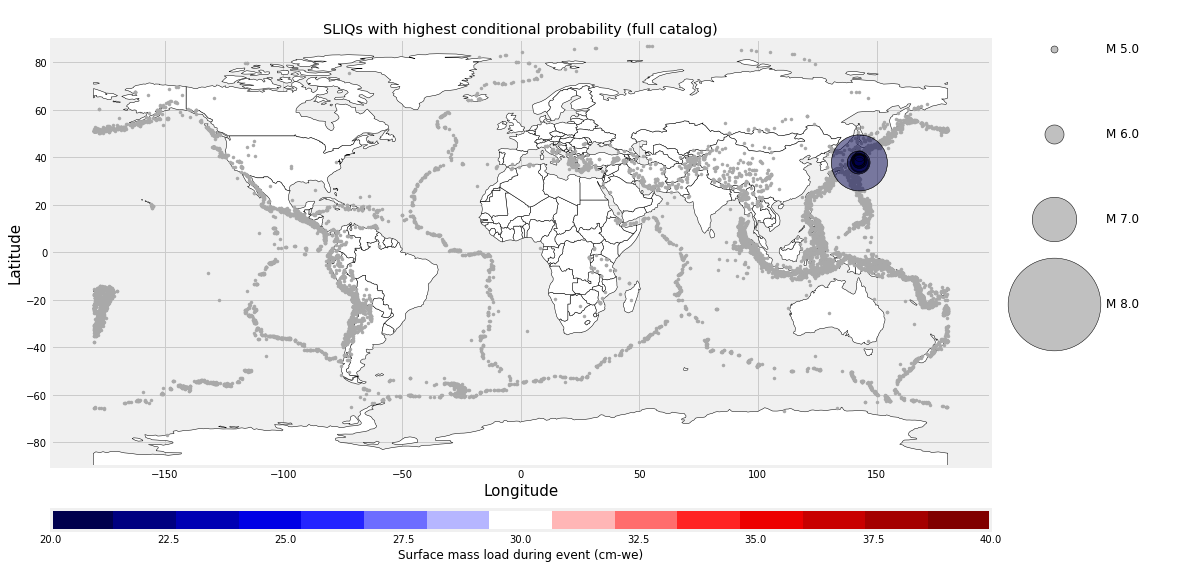

In [4]:
importlib.reload(loadquakes)
plt.style.use('fivethirtyeight')

loadquakes.load_map_cb(catalog,sliq_full.head(10),sliq_full.dmass.head(10),
                'SLIQs with highest conditional probability (full catalog)',20,40,11,circle_scale=1e-6)

### 4. Plot the SLIQs from the NND declustered catalog with highest CP

In [5]:
sliq_nnd=NND_declustered.sort_values('cp',ascending=False)
sliq_nnd=sliq_nnd.reset_index()
sliq_nnd=sliq_nnd.drop(['index'], axis=1)


sliq_nnd['dmass']=sliq_nnd['dmass'].astype(float)

<AxesSubplot:title={'center':'Earthquakes with greatest likelihood of being induced by surface loading (NND catalog)'}, xlabel='Longitude', ylabel='Latitude'>

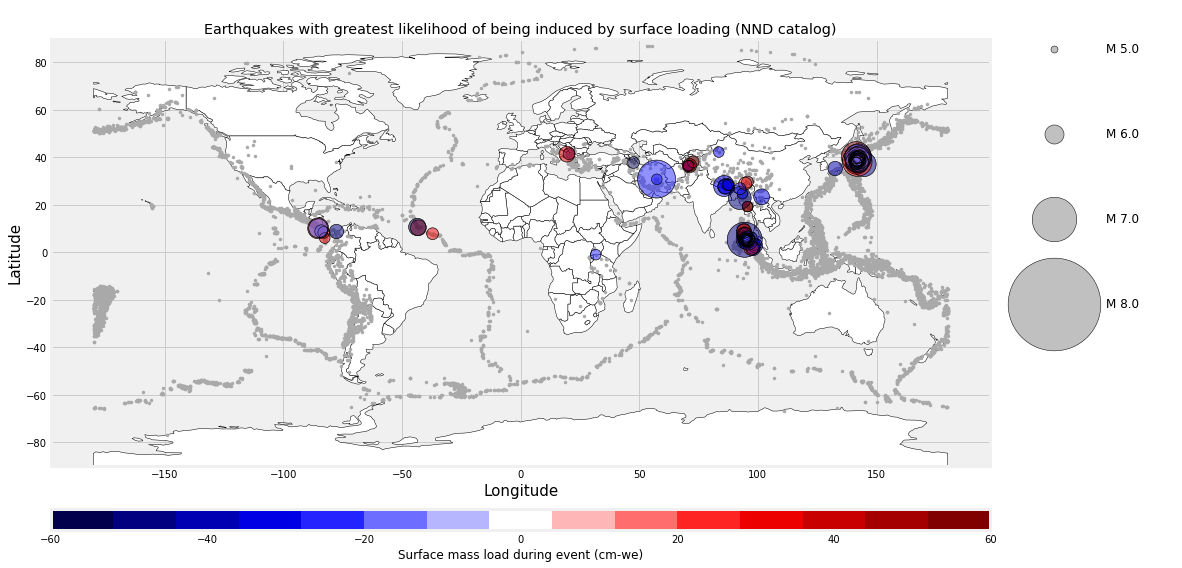

In [6]:
loadquakes.load_map_cb(catalog,sliq_nnd.head(100),sliq_nnd.dmass.head(100),
                'Earthquakes with greatest likelihood of being induced by surface loading (NND catalog)',
                       -60,60,11,circle_scale=1e-6)

In [7]:
sliq_nnd_v2=NND_declustered_v2.sort_values('cp',ascending=False)
sliq_nnd_v2=sliq_nnd_v2.reset_index()
sliq_nnd_v2=sliq_nnd_v2.drop(['index'], axis=1)


sliq_nnd_v2['dmass']=sliq_nnd_v2['dmass'].astype(float)

<AxesSubplot:title={'center':'Earthquakes with greatest likelihood of being induced by surface loading (NND catalog)'}, xlabel='Longitude', ylabel='Latitude'>

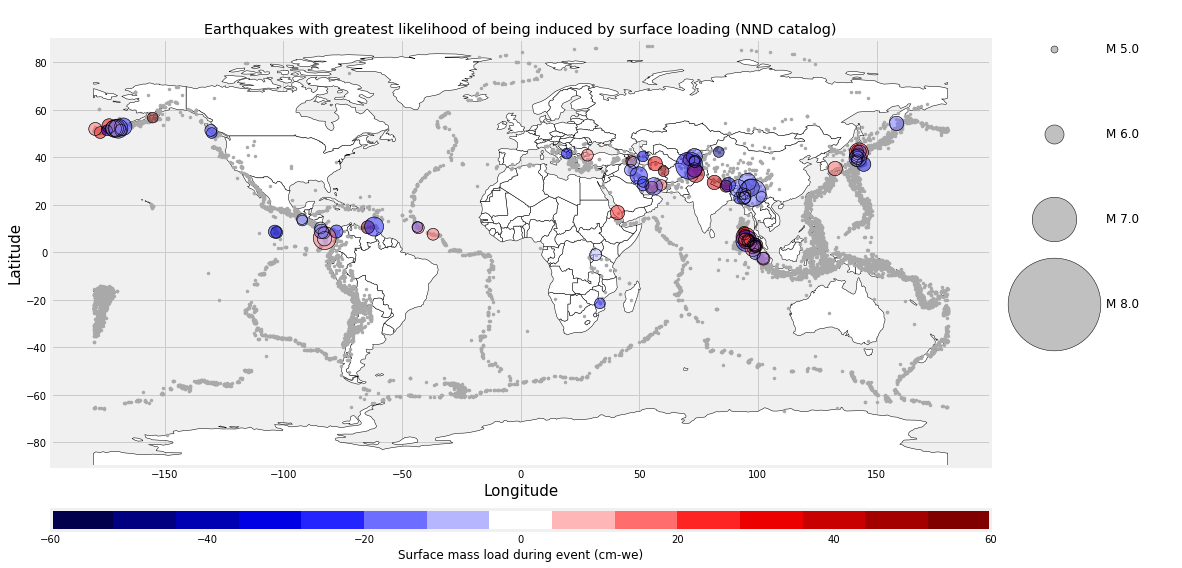

In [8]:
importlib.reload(loadquakes)

loadquakes.load_map_cb(catalog,sliq_nnd_v2.head(100),sliq_nnd_v2.dmass.head(100),
                'Earthquakes with greatest likelihood of being induced by surface loading (NND catalog)',
                       -60,60,11,circle_scale=1e-6)

### 5. Plot the SLIQs from the ETAS declustered catalog with highest CP

In [9]:
sliq_etas=etas_declustered.sort_values('cp',ascending=False)
sliq_etas=sliq_etas.reset_index()
sliq_etas=sliq_etas.drop(['index'], axis=1)

sliq_etas['dmass']=sliq_etas['dmass'].astype(float)

In [24]:
sliq_etas.sort_values('dmass')

,Unnamed: 0,target_id,latitude,longitude,time,magnitude,geometry,mc_current,mc_current_above_ref,mu,P_triggered,P_background,zeta_plus_1,depth,dmass,cp
4,4410,4412,40.3731,51.5739,2014-06-07 06:05:29.910,5.5,POINT (40.3731 51.5739),5.4,0.0,6.907373e-11,0.792073,0.207927,1.0,30.51,-43.055702,7.904443
5,2487,2489,29.8333,94.9838,2017-11-17 22:34:19.450,6.4,POINT (29.8333 94.9838),5.4,0.0,6.907373e-11,0.784964,0.215036,1.0,8.00,-34.524164,3.926561
6,1412,1414,41.3375,19.5303,2019-09-21 14:04:25.803,5.6,POINT (41.3375 19.5303),5.4,0.0,6.907373e-11,0.854188,0.145812,1.0,20.00,-31.479464,3.372833
78,4954,4956,16.7070,40.8310,2013-07-08 15:30:28.060,5.5,POINT (16.707 40.831),5.4,0.0,6.907373e-11,0.282867,0.717133,1.0,10.50,-21.582529,1.519625
143,9204,9206,20.5030,100.7320,2007-05-16 08:56:14.120,6.3,POINT (20.503 100.732),5.4,0.0,6.907373e-11,0.636321,0.363679,1.0,9.00,-19.483535,1.147464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,8332,8334,25.0390,97.6970,2008-08-21 12:24:30.930,6.0,POINT (25.039 97.697),5.4,0.0,6.907373e-11,0.853446,0.146554,1.0,10.00,27.661882,2.406558
0,10466,10468,28.8810,94.6260,2005-06-01 20:06:41.450,5.8,POINT (28.881 94.626),5.4,0.0,6.907373e-11,0.796710,0.203290,1.0,25.80,31.352074,11.914214
2,11862,11864,22.8540,92.3060,2003-07-26 23:18:17.960,5.7,POINT (22.854 92.306),5.4,0.0,6.907373e-11,0.891394,0.108606,1.0,10.00,31.683223,11.914214
1,11826,11828,29.5730,95.6050,2003-08-18 09:03:03.520,5.5,POINT (29.573 95.605),5.4,0.0,6.907373e-11,0.585476,0.414524,1.0,33.00,31.846877,11.914214


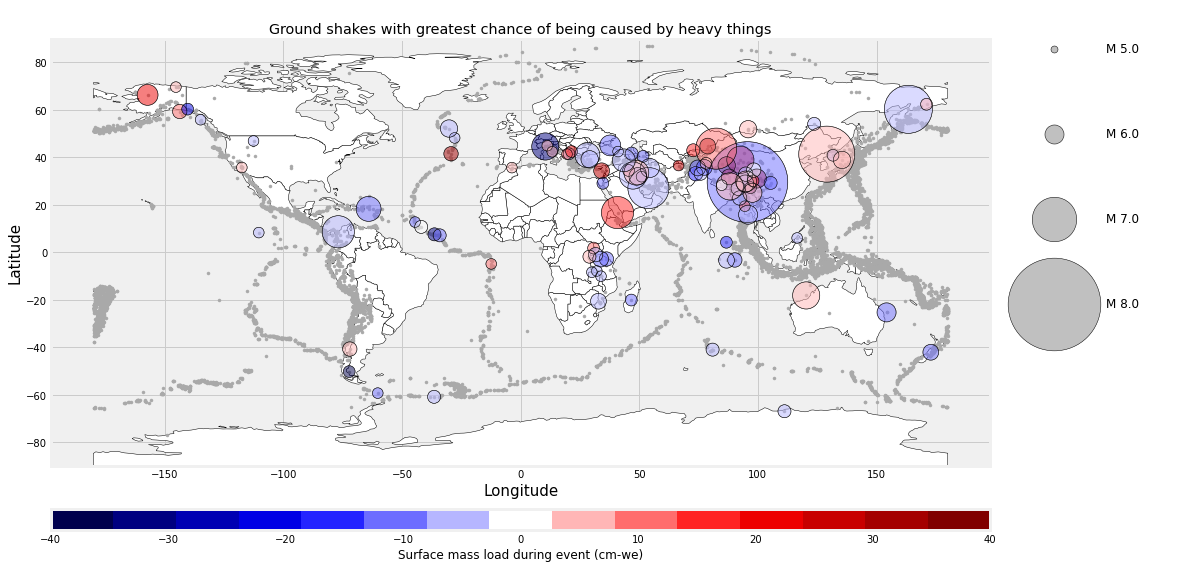

In [11]:
importlib.reload(loadquakes)

ax=loadquakes.load_map_cb(catalog,sliq_etas.head(100),sliq_etas.dmass.head(100),
                'Ground shakes with greatest chance of being caused by heavy things',
                          -40,40,11,circle_scale=1e-6)

In [12]:
nyingchi=sliq_etas.head(100)[(sliq_etas.head(100).latitude>10) & 
          (sliq_etas.head(100).latitude<50) & 
          (sliq_etas.head(100).longitude>-40) & 
          (sliq_etas.head(100).longitude<110)]

(10.0, 60.0)

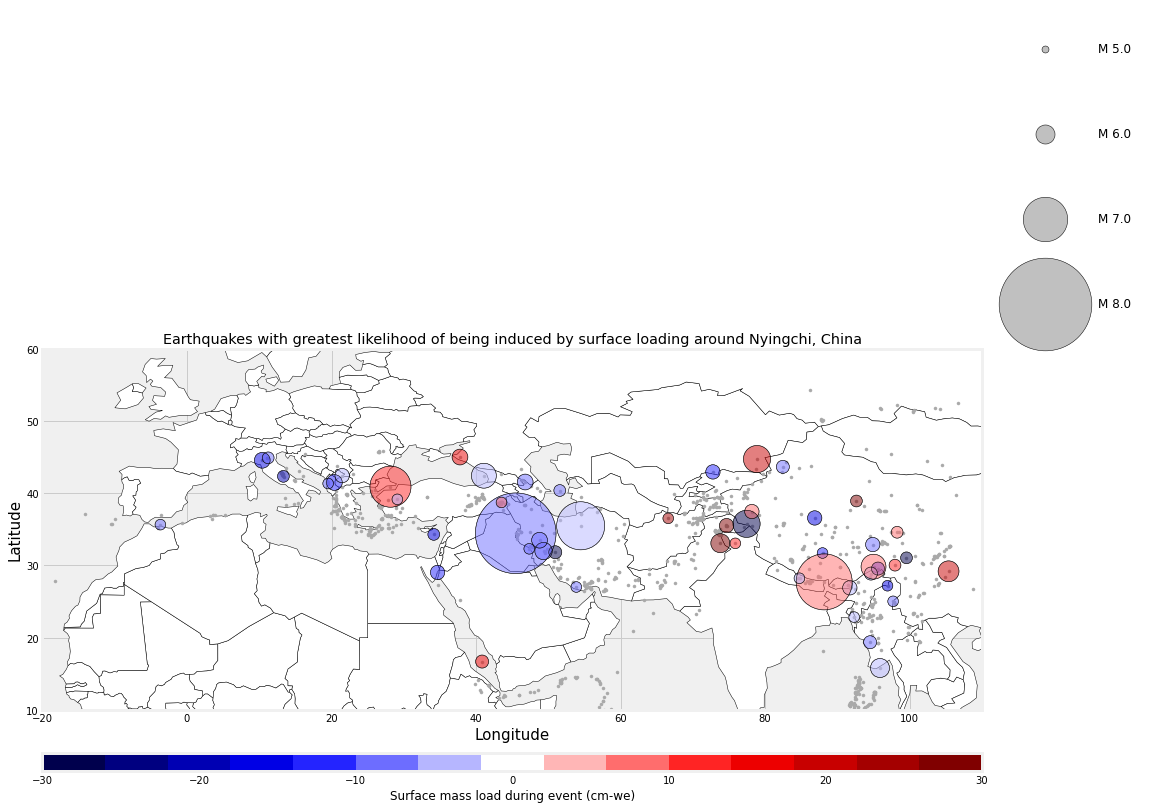

In [13]:
importlib.reload(loadquakes)

ax=loadquakes.load_map_cb(catalog,nyingchi,nyingchi.dmass,
                'Earthquakes with greatest likelihood of being induced by surface loading around Nyingchi, China',
                          -30,30,11,circle_scale=1e-6)
ax.set_xlim([-20,110])
ax.set_ylim([10,60])

for discussion:
- biggest mag $\checkmark$
- biggest surface load $\checkmark$
- biggest cp $\checkmark$
- for ocean loading, mention wave activity + storm surges + transient oscillations in sea surface height + ocean bottom pressure
- how this ties into seismicity blurb $\checkmark$

main text figures:
- etas histogram $\checkmark$
- etas load map $\checkmark$

supplemental figs:
- 3x3 histogram $\checkmark$
- etas cp map $\checkmark$
- nnd load map $\checkmark$ (talk about how it doesn't work at our scale)
- xizang map $\checkmark$ *(double check the xizang map and extend it from euro collision belt)
- grace snapshots (also just for biggest and best!) $\checkmark$
- histogram for random data $\checkmark$
- histogram for events in the ocean and their load (all sliqs, then top 100 sliqs)

misc:

- for snapshots, look at pca snapshots with big loading + big cp $\checkmark$
- cite appropriate papers in overleaf (the one brad just sent in zulip (2/27) $\checkmark$
- some are associated with flexure! (land)
- MOR activity is correlated with unloading?
- most of the ocean events are on the equatorial MOR!
- discuss bigger context with supplemental figures -- describe state of global surafce mass field (regional context): Gorkha happenned during period of unloading (non-monsoon season) associated with the pre-monsoon phase of the hydrological cycle. (unseasonably early mass anomaly) - most events actually happen in the summer in Nepal.
--> consistent with Bollinger! 


- fix captions (add cp in caption)
- high probability (biggest load/unload?)
- patterns: basin, ocean current, regional pattern?
- 


Mean on land: 0.004155612398937623, skew: 0.40638983567269427
Mean not on land: -0.5323969390262041, skew: 0.053272973031699464


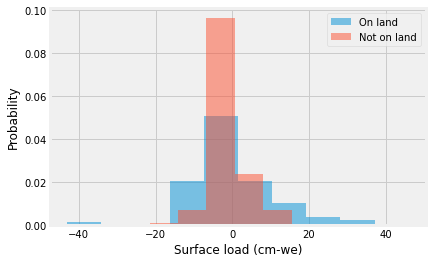

In [22]:
# Check if a point is on land:
from scipy.stats import skew
is_on_land = globe.is_land(sliq_etas.latitude, sliq_etas.longitude) & (sliq_etas.cp > 1)
is_not_on_land = ~globe.is_land(sliq_etas.latitude, sliq_etas.longitude) & (sliq_etas.cp > 1)

dmass = sliq_etas.dmass

plt.hist(dmass[is_on_land],10,density=True,alpha=0.5,label='On land')
plt.hist(dmass[is_not_on_land],5,density=True,alpha=0.5,label='Not on land')
plt.xlabel('Surface load (cm-we)')
plt.ylabel('Probability')
print(f'Mean on land: {np.mean(dmass[is_on_land])}, skew: {skew(dmass[is_on_land])}')
print(f'Mean not on land: {np.mean(dmass[is_not_on_land])}, skew: {skew(dmass[is_not_on_land])}')
# print(f'Mean globa: {np.mean(sliq_etas.dmass)}, skew: {skew(sliq_etas.dmass)}')
plt.legend()
plt.show()

# put this in supplemental figure with caption that includes skew, mean, and that the Z-test states that they aren't significantly different.

In [15]:
'''
2-sample Z-test
'''

mu1 = np.mean(dmass[is_on_land])
mu2 = np.mean(dmass[is_not_on_land])
std1 = np.std(dmass[is_on_land])
std2 = np.std(dmass[is_not_on_land])
n1 = len(dmass[is_on_land])
n2 = len(dmass[is_not_on_land])

print(f'Z = {(mu1-mu2)/np.sqrt((std1**2/n1) + (std2**2/n2))}')

Z = 0.5030207951042269


In [16]:
is_on_land

0       True
1       True
2       True
3       True
4       True
       ...  
532    False
533    False
534    False
535    False
536    False
Name: cp, Length: 537, dtype: bool

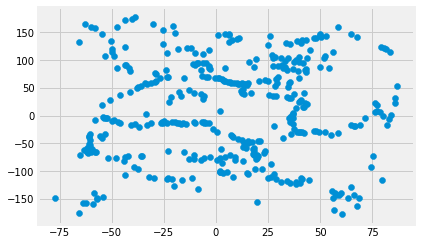

In [17]:
ocean_latitudes = []
ocean_longitudes = []

for i in range(len(sliq_etas)):
    if is_on_land[i]==False:
        lat = sliq_etas.latitude[i]
        lon = sliq_etas.longitude[i]
        ocean_latitudes.append(lat)
        ocean_longitudes.append(lon)

fig, ax = plt.subplots()
ax.scatter(ocean_latitudes, ocean_longitudes)
plt.show()

In [18]:
def land_mask(full_catalog,events,color,label,vmin,vmax,markersize_scale,circle_scale=1e-5):
    
    is_on_land = globe.is_land(events.latitude, events.longitude)
    
    ocean_lat = []
    ocean_lon = []

    for i in range(len(events)):
        if is_on_land[i]==False:
            lat = events.latitude[i]
            lon = events.longitude[i]
            ocean_lat.append(lat)
            ocean_lon.append(lon)

    gdf=gpd.GeoDataFrame(events, geometry=gpd.points_from_xy(ocean_lon,
                                                             ocean_lat))
    
    world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    ax=world.plot(color='white', edgecolor='black', figsize=(15,10))
    divider=make_axes_locatable(ax)
    cax=divider.append_axes("bottom", size="5%", pad=0.6)
    
    # plotting all events in tiny grey dots
    ax.scatter(full_catalog.longitude,full_catalog.latitude,c="darkgrey",marker=".")
    
    for i in [5,6,7,8]:
        ax.scatter(0,
                   1000,
                   c="silver",
                   s=circle_scale*i**(markersize_scale),
                   label=f'        M {i}.0',
                   edgecolor='k')
        
    cmap = cm.get_cmap('seismic',15) # 15 discrete colors
    gdf.plot(ax=ax,cax=cax,alpha=0.5,column=color,cmap=cmap,legend=True,
             edgecolor='k',
             markersize=circle_scale*(events.magnitude)**markersize_scale,
             legend_kwds={'label': "Surface mass load during event (cm-we)",
                            'orientation': "horizontal"},
            vmax=vmax,
            vmin=vmin)
    
    gdf.plot(ax=ax,facecolor="None",
         edgecolor='k',
         markersize=circle_scale*(events.magnitude)**markersize_scale)
    
    ax.set_xlabel('Longitude', fontsize=15)
    ax.set_ylabel("Latitude", fontsize=15)
    ax.set_title(label)
    
    ax.legend(
       fontsize=12,
       bbox_to_anchor=(1.01, 0.99, 0.1, 0.1),
       labelspacing=6,
       frameon=False,
       borderpad=3)

# legend for nyingchi map
#     ax.legend(
#         fontsize=12,
#         labelspacing=6,
#         frameon=True,
#         borderpad=2,
#         framealpha=1)
    
    ax.set_ylim([-90,90])
    return ax